<a href="https://colab.research.google.com/github/norulwahab/nor_python_ml/blob/main/Malaria_cnn_Functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten, InputLayer,BatchNormalization, Input
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [6]:
dataset, dataset_info=tfds.load('malaria',with_info=True, as_supervised=True,shuffle_files=True, split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteCVJ5W2/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [7]:
def splits(dataset, TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
  DATASET_SIZE = len(dataset)
  train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))

  return train_dataset,val_dataset,test_dataset

In [8]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

train_dataset,val_dataset,test_dataset = splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)


##Data Visualization##

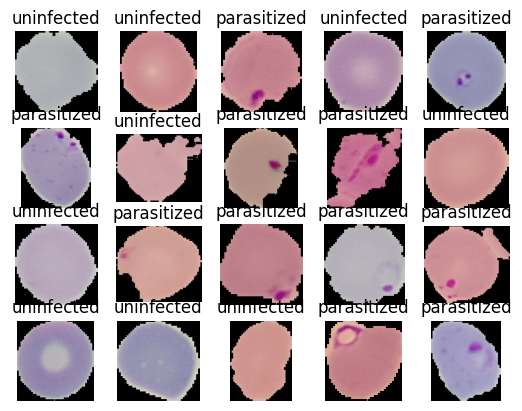

In [9]:
for i, (image, label) in enumerate(train_dataset.take(20)):
  plt.subplot(4,5,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

##Processing##


In [10]:
IMAGE_SIZE=224
def resize_rescale(image,label):
  return tf.image.resize(image, (IMAGE_SIZE,IMAGE_SIZE))/255.0,label

In [11]:
train_dataset=train_dataset.map(resize_rescale)
val_dataset=val_dataset.map(resize_rescale)
test_dataset=test_dataset.map(resize_rescale)
# for image,label in train_dataset.take(1):
#   print(image,label)

In [12]:
train_dataset=train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [13]:
val_dataset=val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [14]:
test_dataset=test_dataset.batch(1)

##Model Creation and Training


##Functional API##

In [16]:
func_input = Input(shape = (IMAGE_SIZE,IMAGE_SIZE,3), name='Input_Image')

x = Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')(func_input)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=2, strides=2)(x)

x = Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=2, strides=2)(x)

x = Flatten()(x)

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation='relu')(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation='sigmoid')(x)

lenet_func_model= Model(func_input,func_output, name='Lenet_Model')
lenet_func_model.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Bat  (None, 109, 109, 16)      

In [17]:
lenet_func_model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(),metrics='accuracy')

In [18]:
history= lenet_func_model.fit(train_dataset,validation_data= val_dataset,epochs=20,verbose=1)

Epoch 1/20
689/689 [==============================] - 61s 68ms/step - loss: 0.3888 - accuracy: 0.8247 - val_loss: 0.4345 - val_accuracy: 0.8207
Epoch 2/20
689/689 [==============================] - 46s 67ms/step - loss: 0.1874 - accuracy: 0.9340 - val_loss: 0.3004 - val_accuracy: 0.8784
Epoch 3/20
689/689 [==============================] - 47s 68ms/step - loss: 0.1524 - accuracy: 0.9459 - val_loss: 0.4352 - val_accuracy: 0.8214
Epoch 4/20
689/689 [==============================] - 46s 67ms/step - loss: 0.1232 - accuracy: 0.9555 - val_loss: 1.3859 - val_accuracy: 0.8065
Epoch 5/20
689/689 [==============================] - 51s 74ms/step - loss: 0.0942 - accuracy: 0.9656 - val_loss: 0.2027 - val_accuracy: 0.9445
Epoch 6/20
689/689 [==============================] - 53s 76ms/step - loss: 0.0743 - accuracy: 0.9735 - val_loss: 0.2093 - val_accuracy: 0.9358
Epoch 7/20
689/689 [==============================] - 55s 79ms/step - loss: 0.0631 - accuracy: 0.9779 - val_loss: 0.3319 - val_accuracy:

<ipython-input-19-2e8b6b8ce6d7>:6: UserWarning: The label '_' of 'o' starts with '_'. It is thus excluded from the legend.
  plt.legend('Training_Loss','Validation_Loss')
<ipython-input-19-2e8b6b8ce6d7>:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Training_Loss','Validation_Loss')


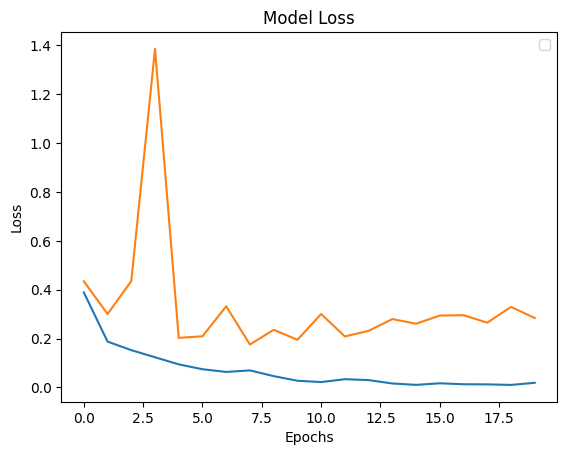

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend('Training_Loss','Validation_Loss')
plt.show()

<ipython-input-20-857611124634>:6: UserWarning: The label '_' of 'c' starts with '_'. It is thus excluded from the legend.
  plt.legend('Training_Accuracy','Validation_Accuracy')
<ipython-input-20-857611124634>:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Training_Accuracy','Validation_Accuracy')


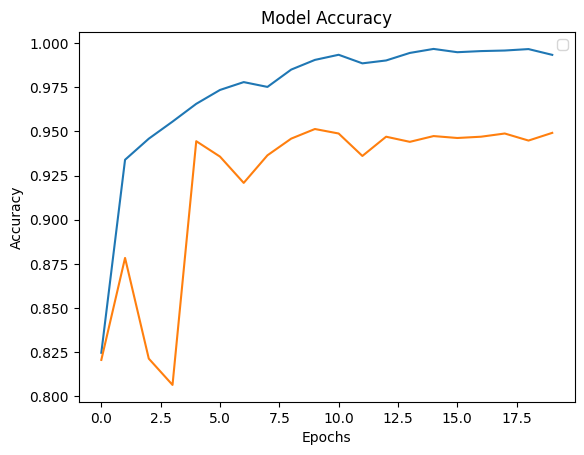

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend('Training_Accuracy','Validation_Accuracy')
plt.show()

In [21]:
lenet_func_model.evaluate(test_dataset)

2757/2757 [==============================] - 23s 4ms/step - loss: 0.3067 - accuracy: 0.9456


[0.30666065216064453, 0.9455930590629578]

In [22]:
lenet_func_model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 11s 11s/step


0.99998116

In [23]:
def infected_or_not(x):
  if(x<0.5):
    return str('I')
  else:
    return str('U')

1/1 [==============================] - 0s 23ms/step


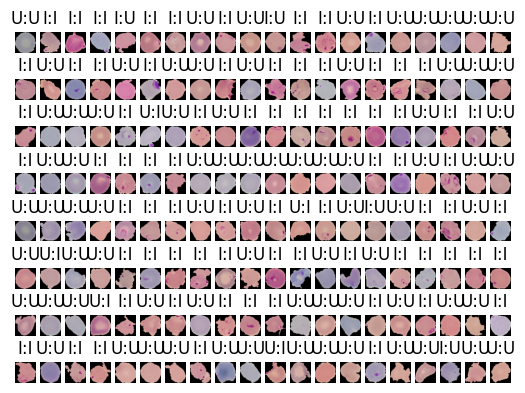

In [25]:
for i,(image,label) in enumerate(test_dataset.take(160)):
  plt.subplot(8,20,i+1)
  plt.imshow(image[0])
  plt.title(str(infected_or_not(label.numpy()[0])) + ':' +str(infected_or_not(lenet_func_model.predict(image)[0][0])))
  plt.axis('off')